In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 可选：首次运行请取消注释
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# 读取原始评论文件
df = pd.read_csv("original reviews.csv")
df.columns = df.columns.str.strip().str.title()

# 初始化工具
lemmatizer = WordNetLemmatizer()
standard_stopwords = set(stopwords.words('english'))


# ✅ 自定义近义词归一映射
synonym_map = {
    "great": "good", "amazing": "good", "fantastic": "good", "excellent": "good",
    "awesome": "good", "nice": "good", "incredible": "good", "incredibly": "good",
    "bad": "poor", "terrible": "poor", "awful": "poor", "horrible": "poor", "sucks": "poor",
    "study": "learn", "learning": "learn", "campus": "location",
    "city": "location", "place": "location", "area": "location", "near": "location", "far": "location", "town": "location",
    "competitive": "hard", "tough": "hard", "difficult": "hard", "challenging": "hard", "stressful": "hard", "effort": "hard",
    "course": "class", "curriculum": "class", "academics": "class", "classes": "class", "subject": "class", "subjects": "class", "academic": "class", "made": "make",
    "career": "job", "recruiting": "job", "recruit": "job", "offer": "job", "internship": "job", "firm": "job", "company": "job", "opportunity": "job", "offering": "job", "opportunities": "job", "interview": "job",
    "social": "network", "networking": "network", "alumni": "network",
    "alumnus network": "network", "alumnus": "network",
    "student body": "size", "body": "size", "environment": "community", "cohort": "community", "part": "community", 
    "bank": "finance", "finance": "finance", "financial": "finance", "banking": "finance",
    "nyc": "newyork", "ny": "newyork", "new york": "newyork", 
    "friend": "classmate",  "peer": "classmate", "colleague": "classmate", 
    "teacher": "professor", "instructor": "professor", "professors": "professor", "teachers": "professor",  
    "together": "team", "teamwork": "team", "collaborate": "team", "collaboration": "team", "group": "team", "groups": "team", "working together": "team", "collaborative": "team", "work together": "team", "work with team": "team", "work with others": "team", "work with classmates": "team", "work with peers": "team",
    "startup": "entrepreneurship", "entrepreneur": "entrepreneurship", "founder": "entrepreneurship", "founders": "entrepreneurship", 
    "consultant": "consulting", "consulting firm": "consulting", "consultants": "consulting", "consultancy": "consulting", "MBB": "consulting", "BCG": "consulting", "McKinsey": "consulting", "Bain": "consulting",
    "diversity": "diverse", "inclusive": "diverse", "inclusivity": "diverse", "diverse community": "diverse", "diversity and inclusion": "diverse",
    "term": "semester", "quarter":"semster", 
    "world": "international", "global": "international", "internationally": "international", "worldwide": "international",
    "event": "activity", "activities": "activity", "eventful": "activity", "events": "activity", "social event": "activity", "social events": "activity", "club": "activity", "clubs": "activity", "club activities": "activity", "club event": "activity", "club events": "activity",
    "case method": "case", "cases": "case", "case study": "case", "case studies": "case", "case-based": "case", "case method approach": "case", "case method teaching": "case",
    "technology": "tech", 
    "supportive": "support",
    "sf": "sanfrancisco", "san francisco": "sanfrancisco", "bay area": "sanfrancisco", "silicon valley": "sanfrancisco",
    "car": "transportation", "bus": "transportation", "train": "transportation", "metro": "transportation", "subway": "transportation", "public transport": "transportation", "public transportation": "transportation", "public transit": "transportation", "commute": "transportation",




}


# ✅ 自定义额外要去掉的停用词
custom_stopwords = set([
    'also', 'even', 'still', 'just', 'however', 'definitely', 'basically',
    'booth', 'hb', 'kellogg', 'mba', 'mit', 'som', 'tuck', 'wharton', 'yale',
    'year', 'columbia', 'etc', 'stern', 'could', 'something', 'able', 'always',
    'extremely', 'really', 'like', 'much', 'many', 'lot', 'little', 'way', 'one',
    'sloan', 'take', 'two', 'youre', 'especially', 'im', 'cbs', 'well', 'good', 'think', 'find', 'best', 'make', 'harvard', 'stanford','thing', 'great', 'amazing', 'fantastic', 'excellent', 'awesome', 'nice', 'incredible', 'incredibly', 'bad', 'terrible', 'awful', 'horrible', 'sucks', 'business', 'go', 'going', 'make', 'made', 'find', 'simply', 'want', 'will', 'ive','help', 'dont', 'willing', 'appreciate', 'come', 'meet', 'overall', 'example', 'school', 'met', 'university', 'need', 'get', 'took', 'look', 'looking', 'believe', 'feel', 'know', 'program', 'big', 'small', 'huge', 'every', 'top', 'best', 'went','would', 'say', 'interested', 'give', 'gave', 'first', 'second', 'ton', 'anything', 'applicant', 'dartmouth', 'tuck', 'student', 'students', 'people', 'person','nyu', 'gsb', 'sport', 'sports', 'postmba', 'emba', 'sanfrancisco', 'newyork', 'chicago', 'boston', 'ivy', 'philadelphia', 'focus', 'perspective', 'perspectives', 'different', 'expectation'
])

# 第一步：标准清洗 + NLTK 停用词处理
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # 去除标点
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in standard_stopwords]
    return ' '.join(words)

# 第二步：去除自定义无意义词
def remove_custom_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)

# 第三步：同义词归一（支持多词）
def normalize_synonyms(text):
    for phrase, replacement in synonym_map.items():
        text = re.sub(r'\b' + re.escape(phrase) + r'\b', replacement, text)
    return text

# 顺序处理：标准清洗 → 自定义停词 → 同义词归一
df['Cleaned_Review'] = df['Review'].apply(clean_text)
df['Cleaned_Review'] = df['Cleaned_Review'].apply(normalize_synonyms)
df['Cleaned_Review'] = df['Cleaned_Review'].apply(remove_custom_stopwords)


# 保存结果
df.to_csv("mba_reviews_cleaned.csv", index=False)
print("清洗完成（包含双重停用词过滤），已保存为 mba_reviews_cleaned.csv")


✅ 清洗完成（包含双重停用词过滤），已保存为 mba_reviews_cleaned.csv


In [38]:
import pandas as pd
from bertopic import BERTopic

# Step 1: 读取清洗后的评论数据
df = pd.read_csv("mba_reviews_cleaned.csv")
df.columns = df.columns.str.strip()
docs = df['Cleaned_Review'].fillna('').tolist()

# Step 2: 初始化并训练 BERTopic 模型
topic_model = BERTopic(language="english", top_n_words=10, verbose=True, min_topic_size=5, n_gram_range=(1, 2))
topics, probs = topic_model.fit_transform(docs)

# Step 3: 将主题标签加入原数据
df['BERTopic_Label'] = topics
df.to_csv("mba_reviews_with_topics.csv", index=False)

# Step 4: 输出每所学校的主题分布（数量 & 百分比）
school_topic_counts = df.groupby(['School', 'BERTopic_Label']).size().unstack(fill_value=0)
school_topic_percent = school_topic_counts.div(school_topic_counts.sum(axis=1), axis=0)

school_topic_counts.to_csv("school_topic_counts.csv")
school_topic_percent.to_csv("school_topic_percent.csv")

# Step 5: 可选：查看每个主题的关键词
for topic_num in topic_model.get_topics().keys():
    print(f"主题 {topic_num}:")
    keywords = [word for word, _ in topic_model.get_topic(topic_num)]
    print(", ".join(keywords))
    print("="*50)


2025-06-08 18:01:51,805 - BERTopic - Embedding - Transforming documents to embeddings.


Batches: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
2025-06-08 18:01:56,959 - BERTopic - Embedding - Completed ✓
2025-06-08 18:01:56,960 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-08 18:01:57,317 - BERTopic - Dimensionality - Completed ✓
2025-06-08 18:01:57,319 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-08 18:01:57,335 - BERTopic - Cluster - Completed ✓
2025-06-08 18:01:57,340 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-08 18:01:57,455 - BERTopic - Representation - Completed ✓


主题 -1:
job, location, class, network, classmate, community, experience, hard, activity, time
主题 0:
job, finance, class, location, consulting, network, investment, experience, professor, investment finance
主题 1:
community, class, location, job, experience, network, support, team, time, faculty
主题 2:
job, community, consulting, class, network, location, activity, international, classmate, finance
主题 3:
class, location, job, experience, classmate, culture, strong, location job, major, network
主题 4:
location, weather, class, snow, dining, earth, fact, fun, live offcampus, rain
主题 5:
class, job, team, leadership, activity, time, work, skill, marketing, helpful
主题 6:
professor, international, classmate, class, experience, learn, new, nobel prize, prize, knowledge experience
主题 7:
entrepreneurship, community, venture, network, tech, there, learn, resource, team, seriously
主题 8:
hard, community, team, grade, hour, classmate, varsity, put, day, class
主题 9:
entrepreneurship, class, super, job, t

In [59]:
topic_model.visualize_barchart(top_n_topics=11).show()


In [44]:
import pandas as pd

# 原始标签 → 合并后新标签
def merge_topics(topic):
    if topic in [3, 5]:
        return '3_5'
    elif topic in [7, 9]:
        return '7_9'
    else:
        return str(topic)  # 其他保留原样（但转成字符串以统一）

df['Merged_Topic'] = df['BERTopic_Label'].apply(merge_topics)


In [45]:
# 重新统计计数表
school_topic_counts_merged = df.groupby(['School', 'Merged_Topic']).size().unstack(fill_value=0)

# 重新计算百分比
school_topic_percent_merged = school_topic_counts_merged.div(school_topic_counts_merged.sum(axis=1), axis=0)

# 保存为 CSV（可选）
school_topic_counts_merged.to_csv("school_topic_counts_merged.csv")
school_topic_percent_merged.to_csv("school_topic_percent_merged.csv")


In [46]:
# 主题重命名映射表
topic_rename_map = {
    '0': 'finance',
    '1': 'community',
    '2': 'consulting',
    '3_5': 'class quality',
    '4': 'location',
    '6': 'professor',
    '7_9': 'entrepreneurship',
    '8': 'course difficulty'
}

# 应用重命名到两个 DataFrame
school_topic_counts_named = school_topic_counts_merged.rename(columns=topic_rename_map)
school_topic_percent_named = school_topic_percent_merged.rename(columns=topic_rename_map)

# 保存为 CSV（可选）
school_topic_counts_named.to_csv("school_topic_counts_named.csv")
school_topic_percent_named.to_csv("school_topic_percent_named.csv")


In [ ]:
import pandas as pd

# 读取学校 x 主题数量分布表
df_counts = pd.read_csv("school_topic_counts_named.csv")
df_counts.set_index("School", inplace=True)

# 去除 -1 主题列（如果存在）
if "-1" in df_counts.columns:
    df_counts = df_counts.drop(columns="-1")

# 重新计算每所学校的主题百分比
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0)

# 保存为命名后的百分比文件
df_percent.to_csv("school_topic_percent_named_ignore outliers (final data).csv")

print("✅ 已去除 -1 主题，并正确生成 school_topic_percent_named_ignore outliers (final data).csv")


✅ 已去除 -1 主题，并正确生成 school_topic_percent_named2.csv


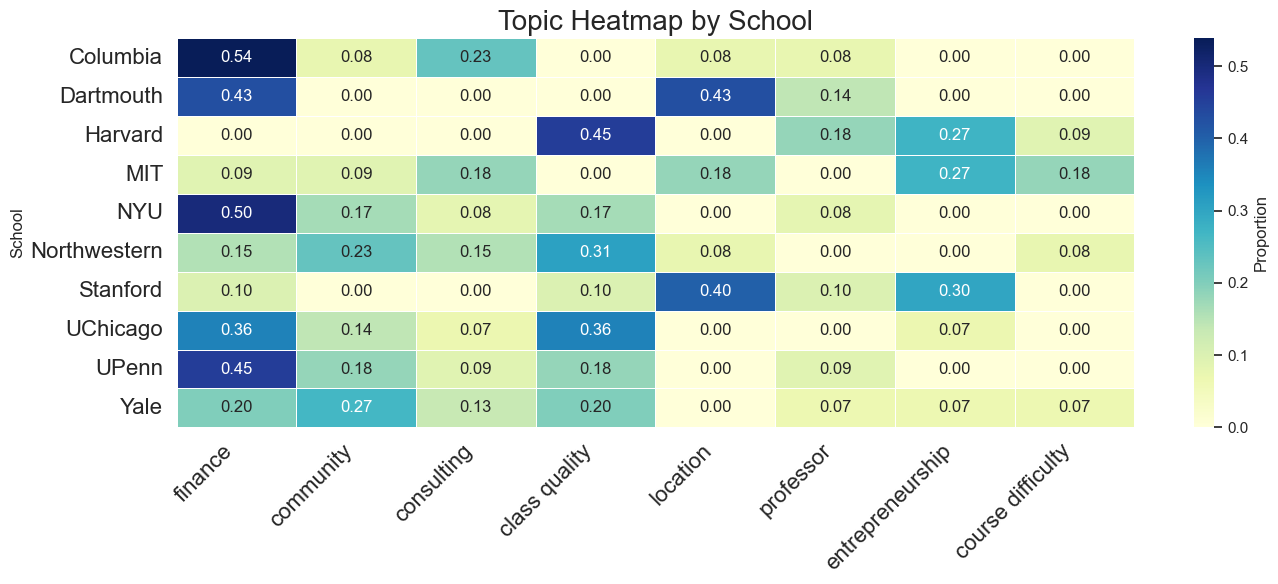

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("school_topic_percent_named_ignore outliers (final data).csv")  # 你的文件名
df.set_index("School", inplace=True)  # 将学校名作为行索引

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制热力图
plt.figure(figsize=(14, 6))
ax = sns.heatmap(
    df,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Proportion'}
)

plt.title("Topic Heatmap by School", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
